In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from utils import *
from time import time

%matplotlib inline

me:  0.5992305278778076
cv:  0.00484776496887207
my keypoints:  290 
cv keypoints:  1532
corner orientations
orientations time:  0.6529114246368408


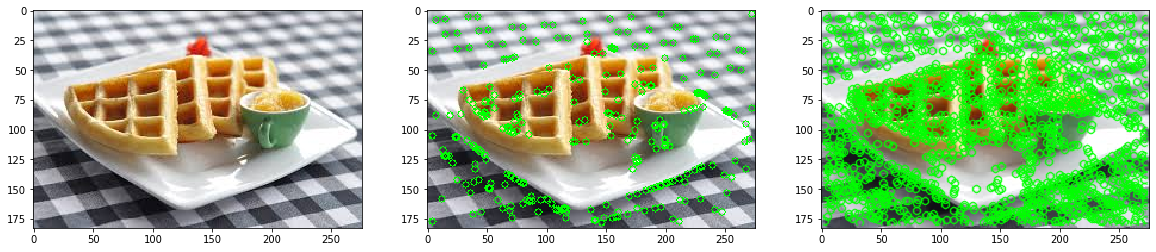

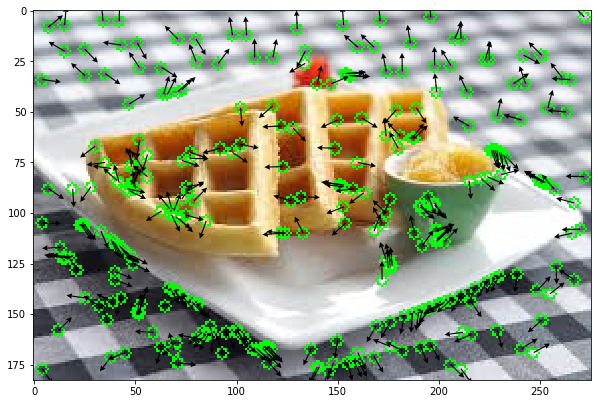

In [2]:
img = cv2.imread('images/waffle.jpg')
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

t1 = time()
keypoints = FAST(gray, N=12, threshold=0.15, nms_window=3)
print('me: ', time()-t1)
features_img = np.copy(img)

for keypoint in keypoints:
    features_img = cv2.circle(features_img, tuple(keypoint), 3, (0,255,0), 1)
# features_img[keypoints] = [0,255,0]

fig = plt.figure(figsize=(20,30))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(features_img)


# using cv2

t2 = time()
fast_cv2 = cv2.FastFeatureDetector_create()
kp = fast_cv2.detect(img, None)
print('cv: ', time()-t2)

img_cv = img
img_cv = cv2.drawKeypoints(img, kp, img_cv, color=(0,255,0))

plt.subplot(1,3,3)
plt.imshow(img_cv)

print('my keypoints: ', len(keypoints), '\ncv keypoints: ', len(kp))

print('corner orientations')
t3 = time()
orientations = corner_orientations(gray, keypoints)
print('orientations time: ', time()-t3)
# print(np.rad2deg(orientations))

plt.figure(figsize=(10,20))
plt.imshow(features_img)
for i in range(keypoints.shape[0]):
    plt.quiver(keypoints[i, 0], keypoints[i, 1], np.cos(orientations[i]), np.sin(orientations[i]), 
               width=0.002, headwidth=5, scale=30)

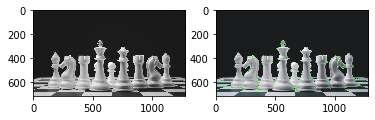

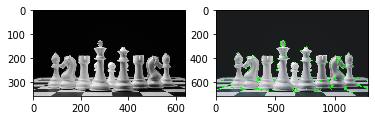

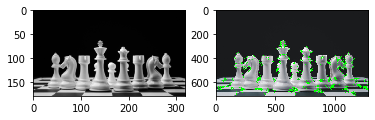

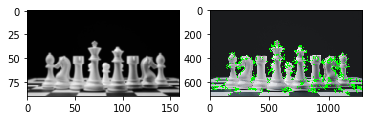

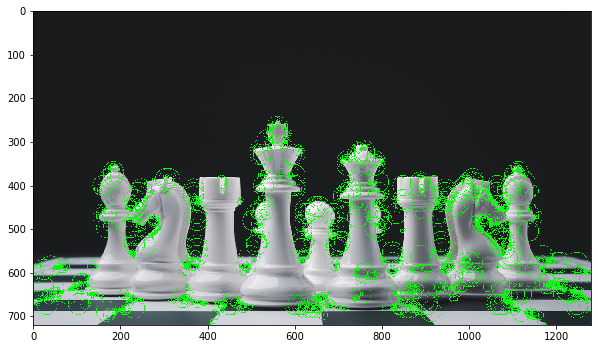

In [3]:
img = cv2.imread('images/chess.jpg')
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray_2 = cv2.pyrDown(gray)
gray_4 = cv2.pyrDown(gray_2)
gray_8 = cv2.pyrDown(gray_4)

scales = [1, 2, 4, 8]
grays = [gray, gray_2, gray_4, gray_8]
features_img = np.copy(img)
for i in range(len(scales)):
    keypoints = FAST(grays[i], N=9, threshold=0.15, nms_window=3)
    for keypoint in keypoints:
        features_img = cv2.circle(features_img, tuple(keypoint*scales[i]), 3*scales[i], (0,255,0), 1)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(grays[i], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(features_img)
    
plt.figure(figsize=(10,30))
plt.imshow(features_img)

me:  10.707698822021484
cv:  0.0009753704071044922
my keypoints:  256 
cv keypoints:  2411
corner orientations
orientations time:  0.5739259719848633


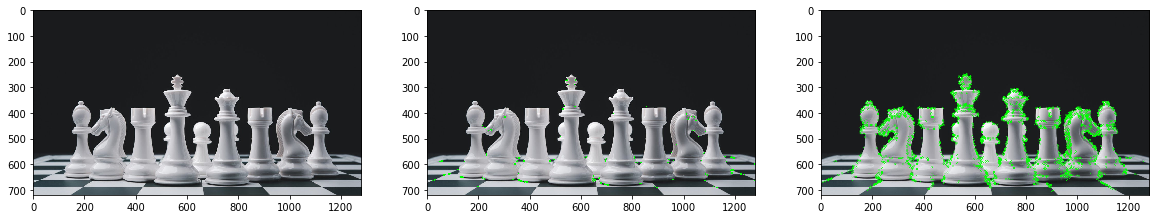

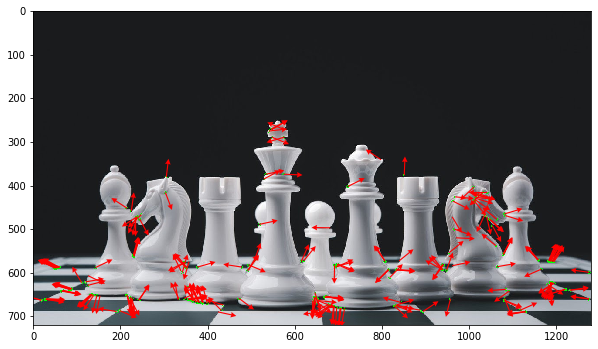

In [4]:
img = cv2.imread('images/chess.jpg')
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

t1 = time()
keypoints = FAST(gray, N=12, threshold=0.15, nms_window=3)
print('me: ', time()-t1)
features_img = np.copy(img)
for keypoint in keypoints:
    features_img = cv2.circle(features_img, tuple(keypoint), 3, (0,255,0), 1)

fig = plt.figure(figsize=(20,30))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(features_img)


# using cv2

t2 = time()
fast_cv2 = cv2.FastFeatureDetector_create()
kp = fast_cv2.detect(img, None)
print('cv: ', time()-t2)

img_cv = img
img_cv = cv2.drawKeypoints(img, kp, img_cv, color=(0,255,0))

plt.subplot(1,3,3)
plt.imshow(img_cv)

print('my keypoints: ', len(keypoints), '\ncv keypoints: ', len(kp))

print('corner orientations')
t3 = time()
orientations = corner_orientations(gray, keypoints)
print('orientations time: ', time()-t3)
# print(np.rad2deg(orientations))

plt.figure(figsize=(10,30))
plt.imshow(features_img)
for i in range(keypoints.shape[0]):
    plt.quiver(keypoints[i, 0], keypoints[i, 1], np.cos(orientations[i]), np.sin(orientations[i]), 
               width=0.002, headwidth=5, scale=30, color='red')

### Blur Test

In [5]:
img1 = cv2.imread('images/beach.jpg')
original_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

t1 = time()
keypoints1 = FAST(gray1, N=9, threshold=0.15, nms_window=3)
print('me: ', time()-t1)

t4 = time()
d1 = BRIEF(gray1, keypoints1, mode='uniform')
print('brief time: ', time()-t4)

img2 = cv2.imread('images/beach.jpg')
original_img = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.blur(img2,(3,3))    # Blurring
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

t1 = time()
keypoints2 = FAST(gray2, N=9, threshold=0.15, nms_window=3)
print('me: ', time()-t1)

t4 = time()
d2 = BRIEF(gray2, keypoints2, mode='uniform')
print('brief time: ', time()-t4)

me:  4.689709901809692
brief time:  1.6874704360961914
me:  3.183716058731079
brief time:  1.0696964263916016


no. of matches:  2418


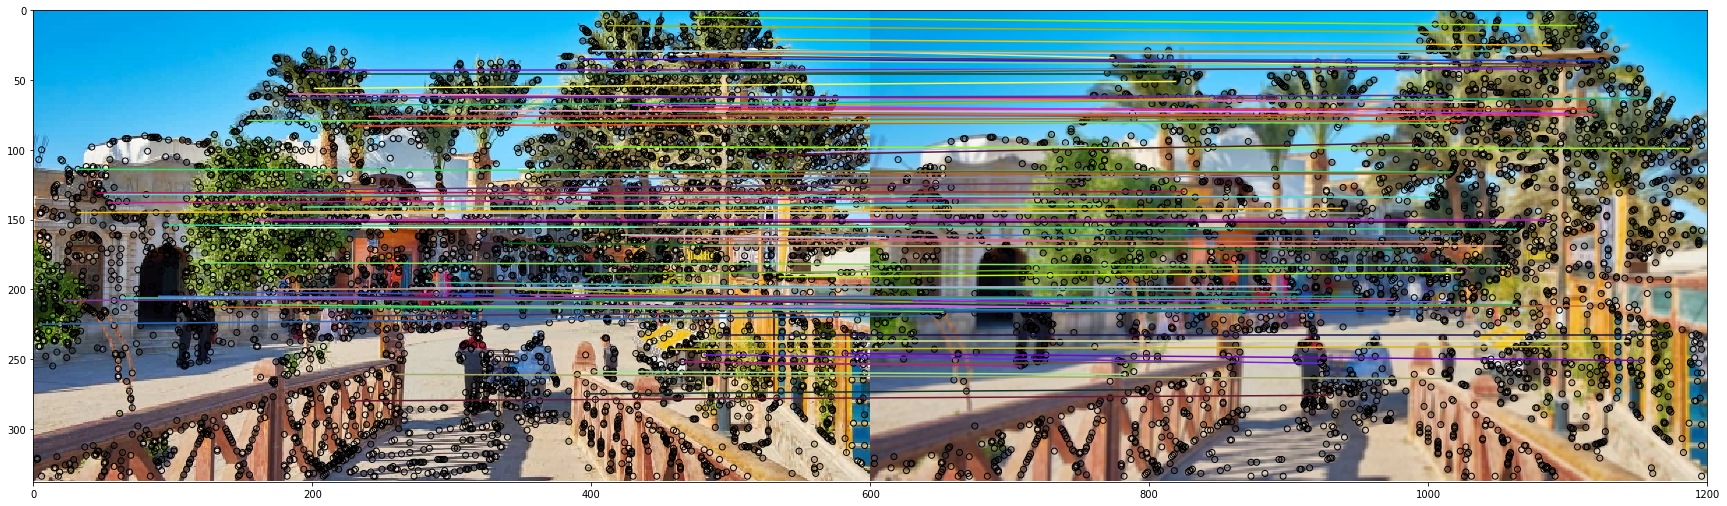

In [6]:
from skimage.feature import plot_matches

matches = match(d1,d2, cross_check=True)
print('no. of matches: ', matches.shape[0])

fig = plt.figure(figsize=(30.0, 50.0))
ax = fig.add_subplot(1,1,1)

plot_matches(ax, img1, img2, np.flip(keypoints1, 1), np.flip(keypoints2, 1), matches[:100])

### Chess Test

In [7]:
img1 = cv2.imread('images/chess2.jpg')
original_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

t1 = time()
keypoints1 = FAST(gray1, N=9, threshold=20, nms_window=3)
print('me: ', time()-t1)

orientations1 = corner_orientations(gray1, keypoints1)

t4 = time()
d1 = BRIEF(gray1, keypoints1, orientations=orientations1, mode='uniform', n=512, patch_size=15)
print('brief time: ', time()-t4)



img2 = cv2.imread('images/chess.jpg')
original_img = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

t1 = time()
keypoints2 = FAST(gray2, N=9, threshold=20, nms_window=3)
print('me: ', time()-t1)

orientations2 = corner_orientations(gray2, keypoints2)

t4 = time()
d2 = BRIEF(gray2, keypoints2, orientations=orientations2, mode='uniform', n=512, patch_size=15)
print('brief time: ', time()-t4)

me:  0.5553438663482666
brief time:  0.2635536193847656
me:  10.895089149475098
brief time:  2.669360876083374


no. of matches:  44


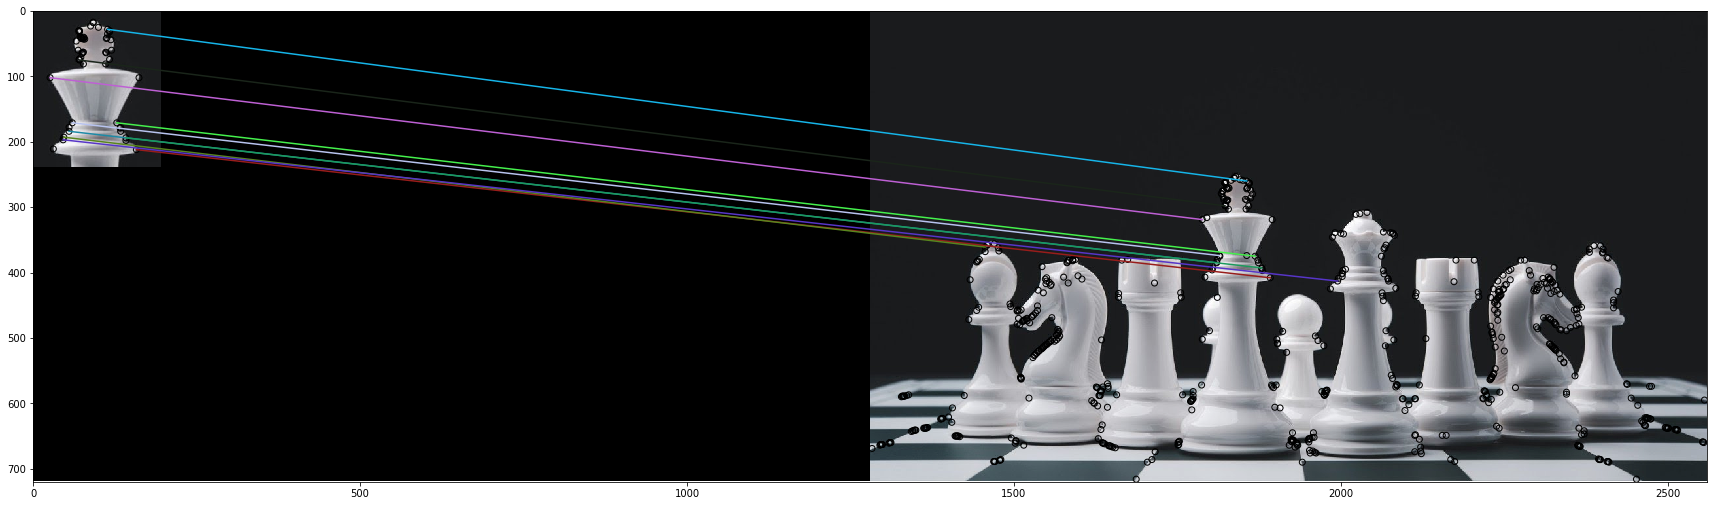

In [8]:
from skimage.feature import plot_matches

matches = match(d1,d2, cross_check=True)
print('no. of matches: ', matches.shape[0])

fig = plt.figure(figsize=(30.0, 50.0))
ax = fig.add_subplot(1,1,1)
plot_matches(ax, img1, img2, np.flip(keypoints1, 1), np.flip(keypoints2, 1), matches[:10])

no of matches:  93


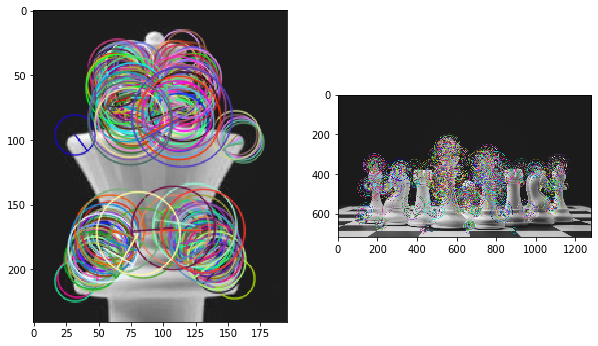

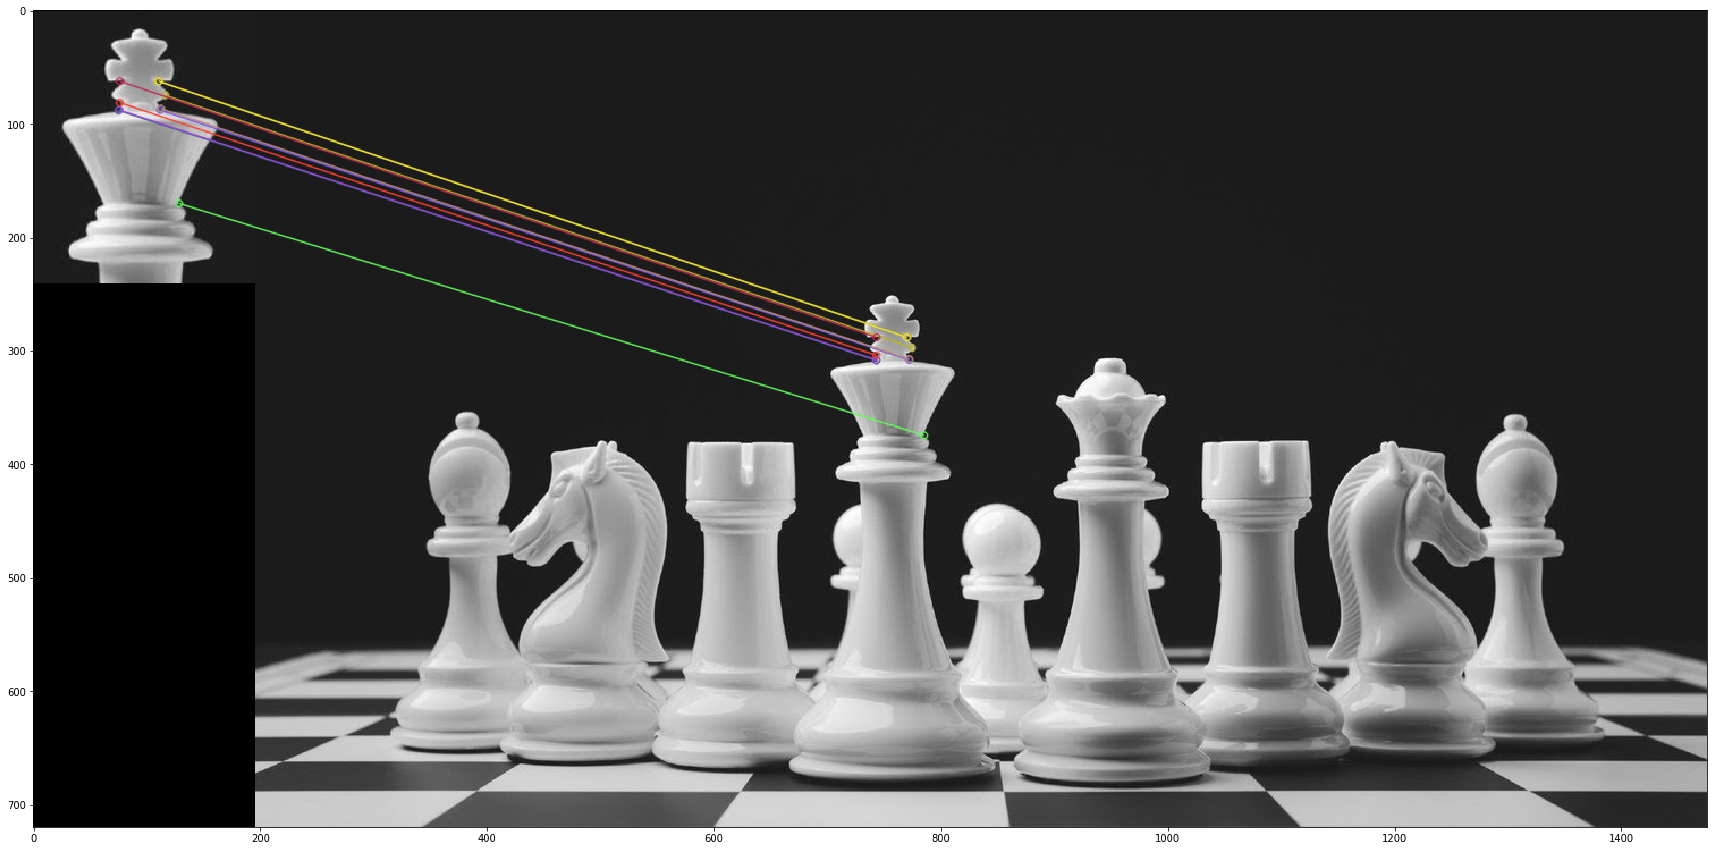

In [9]:
# Compare with OpenCV
orb = cv2.ORB_create(nfeatures=1000, scaleFactor=1.2)
# Train image
cv_kp1, cv_d1 = orb.detectAndCompute(gray1, None)

img1_draw = np.copy(img1)
cv2.drawKeypoints(gray1, cv_kp1, img1_draw, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# query image
cv_kp2, cv_d2 = orb.detectAndCompute(gray2, None)

img2_draw = np.copy(img2)
cv2.drawKeypoints(gray2, cv_kp2, img2_draw, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,40))
plt.subplot(1,2,1)
plt.imshow(img1_draw)
plt.subplot(1,2,2)
plt.imshow(img2_draw)

# Matching 
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches = bf.match(cv_d1, cv_d2)
matches = sorted(matches, key = lambda x : x.distance)
print('no of matches: ', len(matches))

matches_img = cv2.drawMatches(gray1, cv_kp1, gray2, cv_kp2, matches[:10], gray2, flags=2)
plt.figure(figsize=(30.0, 50.0))
plt.imshow(matches_img)

no. of matches:  86


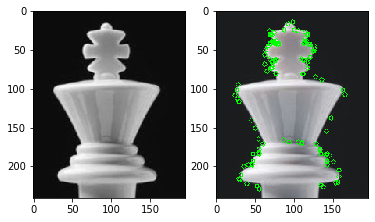

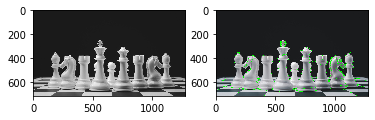

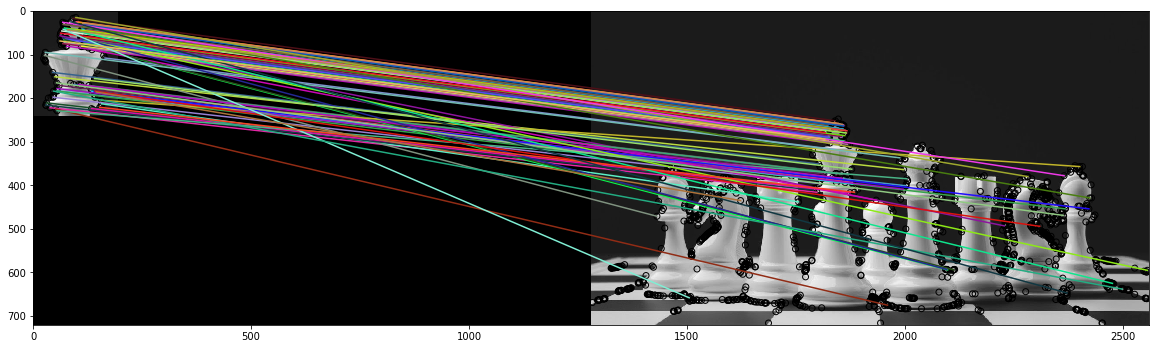

no. of matches:  38


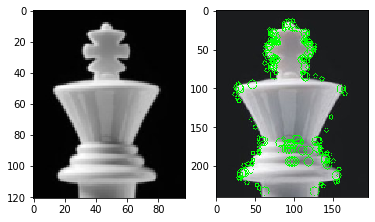

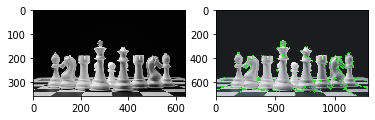

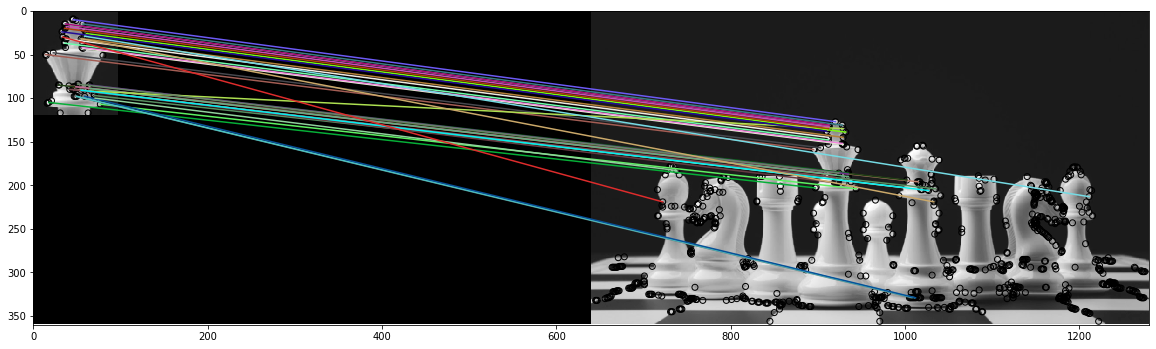

no. of matches:  20


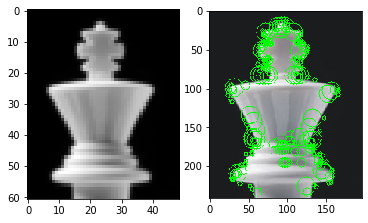

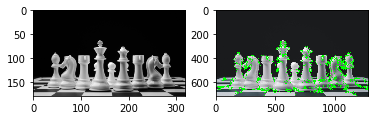

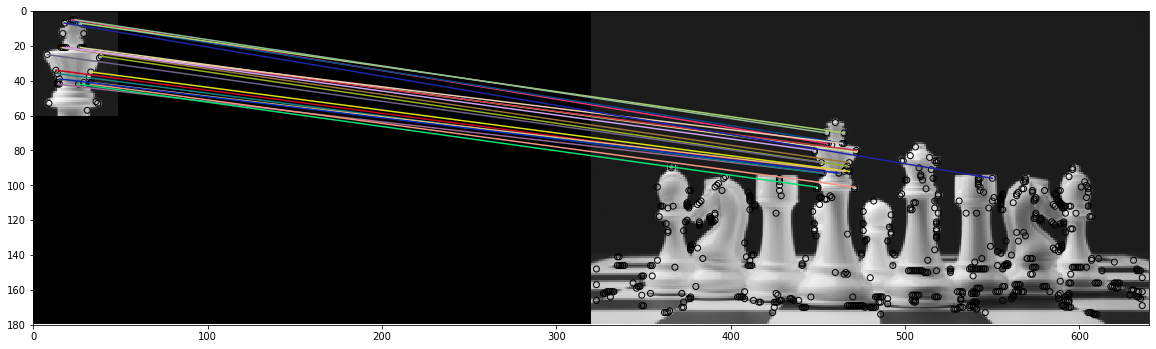

no. of matches:  7


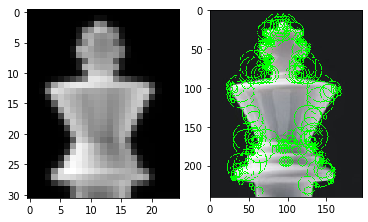

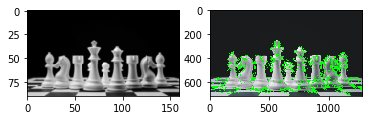

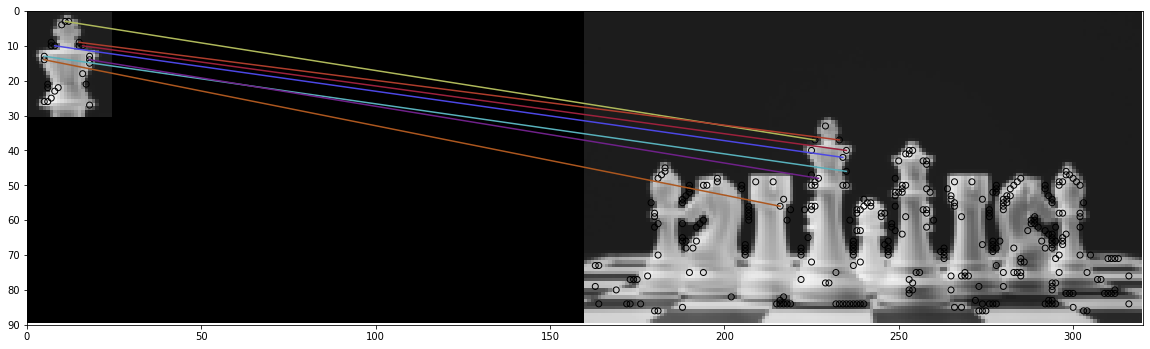

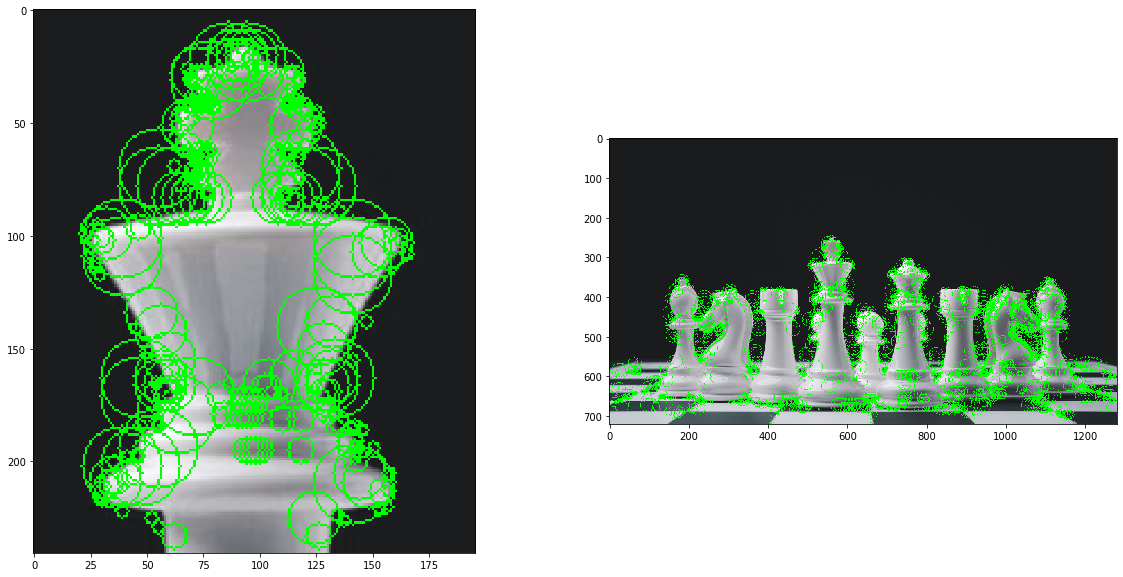

In [10]:
from skimage.transform import pyramid_gaussian

# Trying multi-scale
N_LAYERS = 4
DOWNSCALE = 2

img1 = cv2.imread('images/chess2.jpg')
original_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
grays1 = list(pyramid_gaussian(gray1, downscale=DOWNSCALE, max_layer=N_LAYERS, multichannel=False))

img2 = cv2.imread('images/chess.jpg')
original_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
grays2 = list(pyramid_gaussian(gray2, downscale=2, max_layer=4, multichannel=False))

scales = [(i*DOWNSCALE if i>0 else 1) for i in range(N_LAYERS)]
features_img1 = np.copy(img1)
features_img2 = np.copy(img2)


kps1 = []
kps2 = []
ds1 = []
ds2 = []
ms = []
for i in range(len(scales)):
    scale_kp1 = FAST(grays1[i], N=9, threshold=0.1, nms_window=3)
#     kps1.append(scale_kp1*scales[i])
    kps1.append(np.round(scale_kp1*(gray1.shape[1]/grays1[i].shape[1], gray1.shape[0]/grays1[i].shape[0])).astype(np.int32))
    scale_kp2 = FAST(grays2[i], N=9, threshold=0.1, nms_window=3)
#     kps2.append(scale_kp2*scales[i])
    kps2.append(np.round(scale_kp2*(gray2.shape[1]/grays2[i].shape[1], gray2.shape[0]/grays2[i].shape[0])).astype(np.int32))
    for keypoint in scale_kp1:
        features_img1 = cv2.circle(features_img1, tuple(np.round(keypoint*(gray1.shape[1]/grays1[i].shape[1], gray1.shape[0]/grays1[i].shape[0])).astype(np.int32)), 3*scales[i], (0,255,0), 1)
    for keypoint in scale_kp2:
        features_img2 = cv2.circle(features_img2, tuple(np.round(keypoint*(gray2.shape[1]/grays2[i].shape[1], gray2.shape[0]/grays2[i].shape[0])).astype(np.int32)), 3*scales[i], (0,255,0), 1)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(grays1[i], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(features_img1)

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(grays2[i], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(features_img2)

    d1 = BRIEF(grays1[i], scale_kp1, mode='uniform', patch_size=15, n=512)
    ds1.append(d1)
    d2 = BRIEF(grays2[i], scale_kp2, mode='uniform', patch_size=15, n=512)
    ds2.append(d2)

    matches = match(d1,d2, cross_check=True)
    ms.append(matches)
    print('no. of matches: ', matches.shape[0])

    fig = plt.figure(figsize=(20.0, 30.0))
    ax = fig.add_subplot(1,1,1)

    plot_matches(ax, grays1[i], grays2[i], np.flip(scale_kp1, 1), np.flip(scale_kp2, 1), matches)
    plt.show()


plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(features_img1)
plt.subplot(1,2,2)
plt.imshow(features_img2)
plt.show()

total matches:  151


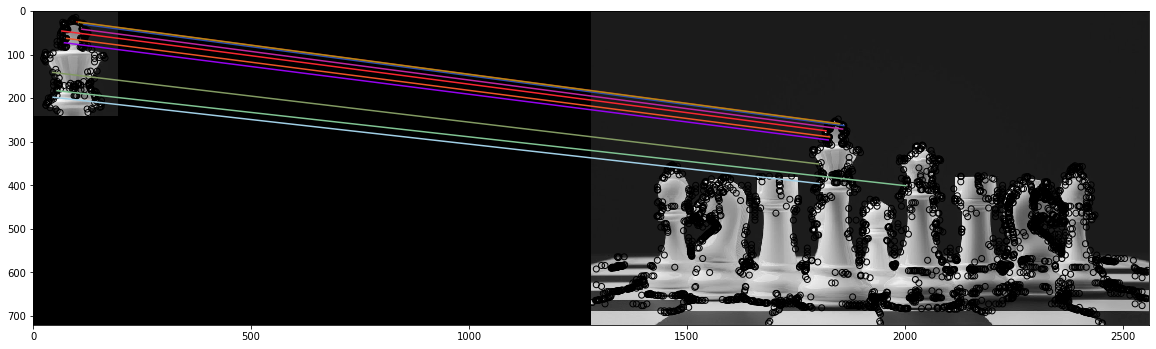

In [11]:
scale_kps1 = np.concatenate(kps1)
scale_kps2 = np.concatenate(kps2)

scale_ds1 = np.concatenate(ds1)
scale_ds2 = np.concatenate(ds2)

# orientations1 = corner_orientations(grays[0], scale_kps1, r_size=49)
# orientations2 = corner_orientations(grays[0], scale_kps2, r_size=49)

# scale_ds1 = BRIEF(grays1[0], scale_kps1)
# scale_ds2 = BRIEF(grays1[0], scale_kps2)

scale_ms = np.concatenate(ms)
# scale_ms = match(scale_ds1, scale_ds2, cross_check=False)

print('total matches: ', len(scale_ms))

fig = plt.figure(figsize=(20.0, 30.0))
ax = fig.add_subplot(1,1,1)
plot_matches(ax, grays1[0], grays2[0], np.flip(scale_kps1, 1), np.flip(scale_kps2, 1), scale_ms[:10])

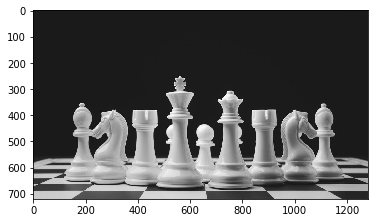

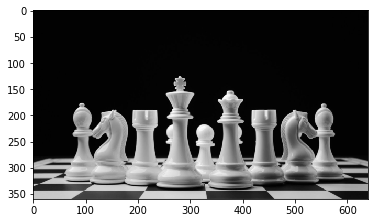

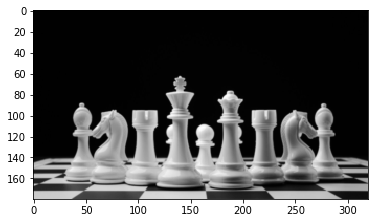

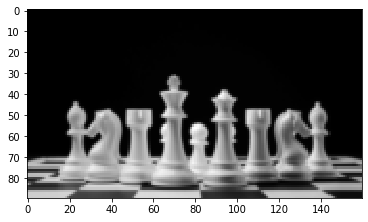

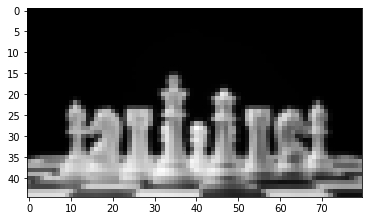

In [12]:
from skimage.transform import pyramid_gaussian

pyramid = list(pyramid_gaussian(gray2, downscale=2, max_layer=4, multichannel=False))

for i in range(len(pyramid)):
    plt.figure()
    plt.imshow(pyramid[i], cmap='gray')